In [2]:
import pandas as pd
from glob import glob

from prophet import Prophet
from datetime import datetime, timedelta
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
import matplotlib.pyplot as plt

c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
global file_name
file_name ='data/merged_congest_data/test_merged_data.csv'

In [4]:
# data set 불러오기
def get_total_data(file_name):
    df_temp = pd.read_csv(file_name)
    df_temp = df_temp.iloc[:,[2,3,4]]
    df_temp.sort_values('area_search',axis=0,ascending=True,inplace=True)
    df_temp.reset_index(drop=True, inplace=True)
    return df_temp

In [5]:
def get_location_data(location):
    df = get_total_data(file_name)
    df_result = df[df['area_search']== location]
    df_result.sort_values('measurement_time', axis=0, ascending=True, inplace=True)
    df_result.reset_index(drop=True, inplace=True)
    return df_result

In [6]:
# 장소 리스트 가져오기
def get_location_lsit():
    place_data = pd.read_excel('data/서울시115장소명 목록_장소명수정_20240527.xlsx')
    location_list = []
    locations = place_data['AREA_SEARCH']

    for location in locations :
        location_list.append(location)

    return location_list

## test

In [45]:
# test 확인
df = get_location_data("가산디지털단지역")
df

C:\Users\20061\AppData\Local\Temp\ipykernel_27728\11390676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.sort_values('measurement_time', axis=0, ascending=True, inplace=True)


,area_search,measurement_time,congest_median
0,가산디지털단지역,2024-05-26 23:35,8250.0
1,가산디지털단지역,2024-05-27 00:05,7750.0
2,가산디지털단지역,2024-05-27 00:35,7250.0
3,가산디지털단지역,2024-05-27 01:05,6750.0
4,가산디지털단지역,2024-05-27 01:35,6750.0
...,...,...,...
74,가산디지털단지역,2024-05-28 13:05,53000.0
75,가산디지털단지역,2024-05-28 13:35,49000.0
76,가산디지털단지역,2024-05-28 14:05,49000.0
77,가산디지털단지역,2024-05-28 14:35,47000.0


In [46]:
df.rename(columns={'measurement_time':'ds', 'congest_median':'y'}, inplace=True)

In [47]:
df

,area_search,ds,y
0,가산디지털단지역,2024-05-26 23:35,8250.0
1,가산디지털단지역,2024-05-27 00:05,7750.0
2,가산디지털단지역,2024-05-27 00:35,7250.0
3,가산디지털단지역,2024-05-27 01:05,6750.0
4,가산디지털단지역,2024-05-27 01:35,6750.0
...,...,...,...
74,가산디지털단지역,2024-05-28 13:05,53000.0
75,가산디지털단지역,2024-05-28 13:35,49000.0
76,가산디지털단지역,2024-05-28 14:05,49000.0
77,가산디지털단지역,2024-05-28 14:35,47000.0


In [48]:
m = Prophet()
m.fit(df)

16:19:55 - cmdstanpy - INFO - Chain [1] start processing
16:19:57 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future_hours = m.make_future_dataframe(periods=24, freq='H')
future_hours

c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
0,2024-05-26 23:35:00
1,2024-05-27 00:05:00
2,2024-05-27 00:35:00
3,2024-05-27 01:05:00
4,2024-05-27 01:35:00
...,...
98,2024-05-29 11:05:00
99,2024-05-29 12:05:00
100,2024-05-29 13:05:00
101,2024-05-29 14:05:00


In [50]:
forecast = m.predict(future_hours)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-05-26 23:35:00,19391.515000,-4091.615625,43417.979252
1,2024-05-27 00:05:00,19611.838038,-4238.245588,42734.468848
2,2024-05-27 00:35:00,19832.161076,-4998.277812,41534.453424
3,2024-05-27 01:05:00,20052.484114,-3102.668756,43528.054165
4,2024-05-27 01:35:00,20272.807152,-4344.783414,42930.766022
...,...,...,...,...
98,2024-05-29 11:05:00,45609.956489,22647.432609,69453.087402
99,2024-05-29 12:05:00,46050.602564,23690.729642,70489.880123
100,2024-05-29 13:05:00,46491.248640,21924.118082,69208.071747
101,2024-05-29 14:05:00,46931.894715,22746.998079,71409.858662


c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


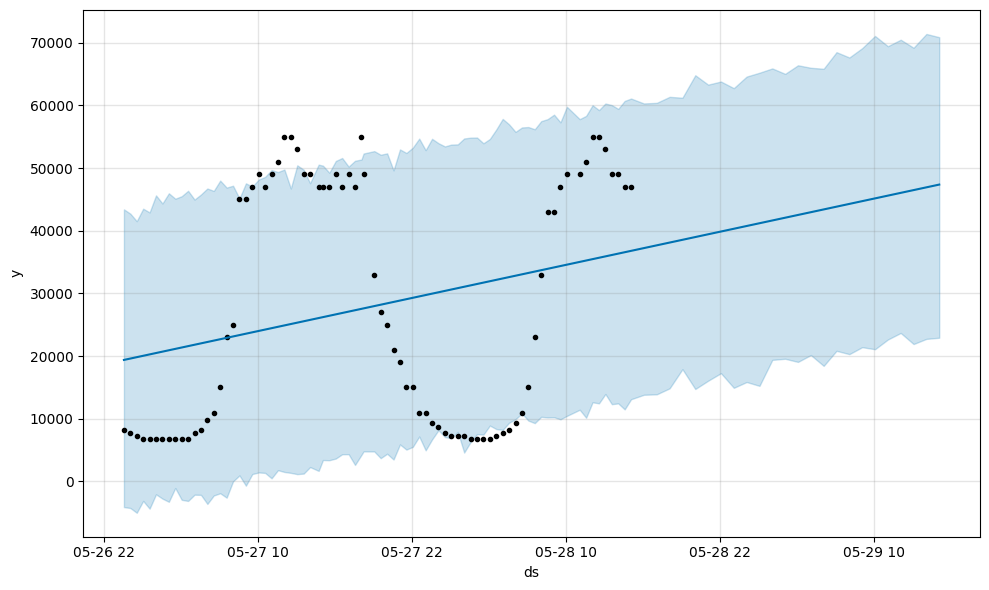

In [51]:
fig1 = m.plot(forecast)

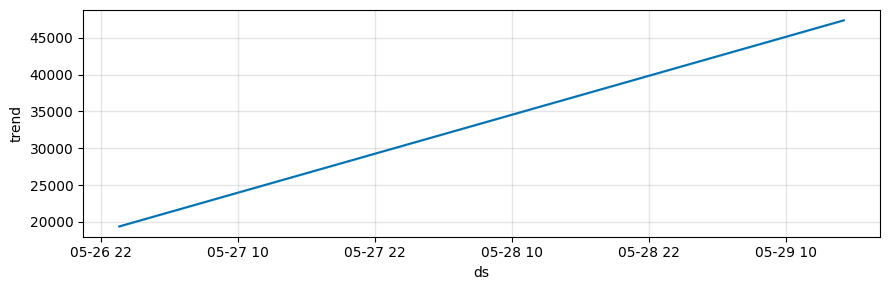

In [53]:
fig2 = m.plot_components(forecast)

## overfitting 발생시키기

In [54]:
m = Prophet(changepoint_prior_scale=0.5)    #changepoint_prior_scale을 높게 설정하여 오버피팅 유도
m.fit(df)

16:20:12 - cmdstanpy - INFO - Chain [1] start processing
16:20:14 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future_hours = m.make_future_dataframe(periods=24, freq='H')
future_hours

c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
0,2024-05-26 23:35:00
1,2024-05-27 00:05:00
2,2024-05-27 00:35:00
3,2024-05-27 01:05:00
4,2024-05-27 01:35:00
...,...
98,2024-05-29 11:05:00
99,2024-05-29 12:05:00
100,2024-05-29 13:05:00
101,2024-05-29 14:05:00


In [56]:
forecast = m.predict(future_hours)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-05-26 23:35:00,3160.311000,-4084.375571,10573.765919
1,2024-05-27 00:05:00,3891.629987,-3856.474147,11536.826946
2,2024-05-27 00:35:00,4622.948975,-2965.879878,11867.388518
3,2024-05-27 01:05:00,5354.267961,-2646.738317,13501.626766
4,2024-05-27 01:35:00,6085.586946,-1487.804688,14204.282034
...,...,...,...,...
98,2024-05-29 11:05:00,151217.505320,80953.096462,223099.862824
99,2024-05-29 12:05:00,155780.913161,80518.269797,230912.433539
100,2024-05-29 13:05:00,160344.321002,81765.019579,243977.125563
101,2024-05-29 14:05:00,164907.728844,80431.734116,253815.260115


c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


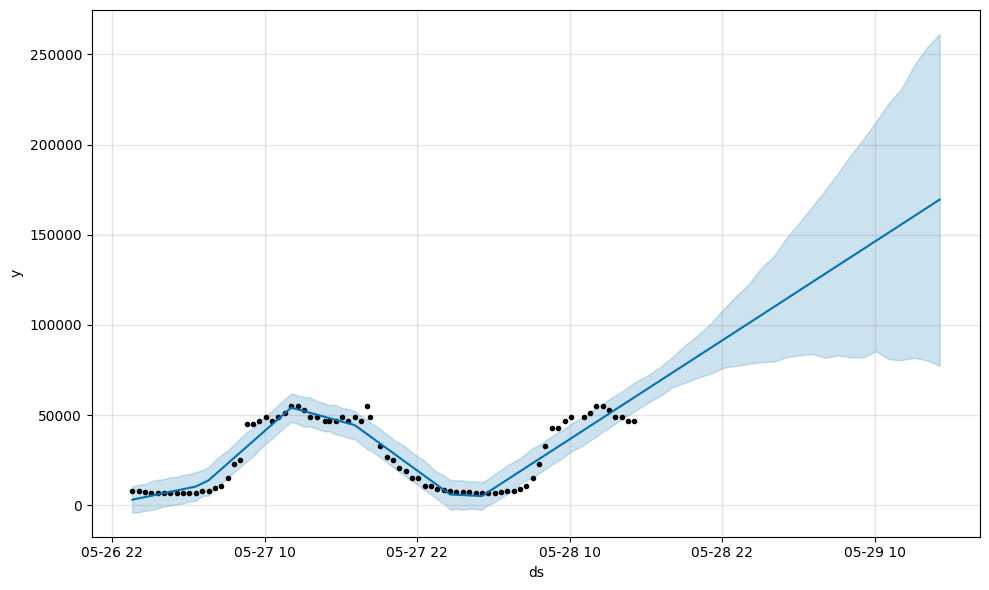

In [57]:
fig1 = m.plot(forecast)

c:\Users\20061\OneDrive\바탕 화면\model-test\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


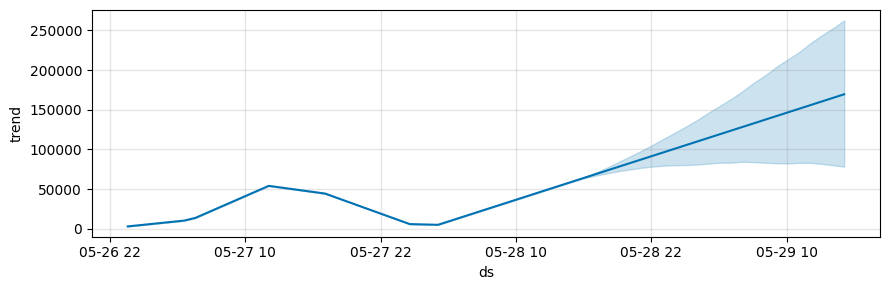

In [58]:
fig2 = m.plot_components(forecast)

## 가짜 데이터 생성

In [59]:
import pandas as pd
import numpy as np
from datetime import timedelta

In [60]:
last_days_data = get_location_data("교대역")
last_days_data['measurement_time'] = pd.to_datetime(data['measurement_time'])
last_days_data

C:\Users\20061\AppData\Local\Temp\ipykernel_27728\11390676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.sort_values('measurement_time', axis=0, ascending=True, inplace=True)


,area_search,measurement_time,congest_median
0,교대역,2024-05-26 23:35:00,3250.0
1,교대역,2024-05-27 00:05:00,2750.0
2,교대역,2024-05-27 00:35:00,2750.0
3,교대역,2024-05-27 01:05:00,2250.0
4,교대역,2024-05-27 01:35:00,2250.0
...,...,...,...
73,교대역,2024-05-28 13:10:00,21000.0
74,교대역,2024-05-28 13:35:00,21000.0
75,교대역,2024-05-28 14:10:00,21000.0
76,교대역,2024-05-28 14:35:00,21000.0


In [61]:
# 5분 단위로 데이터가 수집되므로 주기 계산 (하루에 288개 데이터 포인트)
freq = '5T'
days = 30
period = days * 24 * 60 // 5  # 주어진 일수 동안의 5분 단위 수

# 지난 3일 간의 데이터 반복하여 한 달 간의 데이터 생성
repeated_data = np.tile(last_days_data['congest_median'].values, period // len(last_days_data) + 1)[:period]

# 타임스탬프 생성
end_date = last_days_data['measurement_time'].max() + timedelta(days=days-3)
start_date = last_days_data['measurement_time'].max() + timedelta(days=-30)
date_range = pd.date_range(start=start_date, end=end_date, periods=period)


fake_data = pd.DataFrame({'measurement_time': date_range, 'congest_median': repeated_data})
fake_data


,measurement_time,congest_median
0,2024-04-28 15:05:00.000000000,3250.0
1,2024-04-28 15:14:30.065979858,2750.0
2,2024-04-28 15:24:00.131959717,2750.0
3,2024-04-28 15:33:30.197939576,2250.0
4,2024-04-28 15:43:00.263919435,2250.0
...,...,...
8635,2024-06-24 14:26:59.736080564,2750.0
8636,2024-06-24 14:36:29.802060423,2750.0
8637,2024-06-24 14:45:59.868040282,2250.0
8638,2024-06-24 14:55:29.934020141,2250.0


In [ ]:
data = pd.read_json('data/crawling_congest/data_2024-05-31_15_37.json')